# Reproducing 'Philips' Comparative Wall Atlas of Africa'

Recreating 'Philips' Comparative Wall Atlas of Africa' (circa 1950s).

<details>
<summary><b>Map</b></summary>

<img src='figures/Wall_Map_target.png' width='500px'>
</details>

**Map Size**

- Real size of map (interior border) in inches is 33.5 (width) by 40.5 (height).
- Jupyter size of map (interior border) in inches **@20%** is 6.7 by 8.1.
- Jupyter size of map (interior border) in inches **@30%** is 10.05 by 12.15.


<details>
<summary><b>Map Features</b></summary>

| **Geographical Features**                           | **Climate Variables**                                                          | **Text Lables**                      |
| :-                                                  | :-                                                                             | :-                                   |
| Labelled gridlines                                  | Total rainfall (inches) over 6 month period (land only)                        | Settlements                          |
| Annotations for Equator and the Tropics             | Pressure isobars (in inches and Millibars) for 6 month period (ocean and land) | Land features (e.g. Deserts/Plateaus)|
| Rivers (sized by thickness corresponding to width)  | Prevailing wind (equal-sized arrows) for 6 month period (ocean and land)       | Ocean features (e.g. Channels/Gulfs) |
| National borders (dashed grey lines)                | Lakes and Rivers                                                               | Colorbar, legend, scale, temporal information   
| Wetlands ???                                    | Inset UK climate figure for reference                    |
</details>




## Step 1: Template

Making a template of 'Geographical Features' using inbuilt Cartopy functions.

**Completed Steps:** 

- [x] Ascertain map projection and axis limits (Cartopy Ocean feature does not work for the LAEA projection).
- [Colors for ocean and land](https://github.com/SciTools/cartopy/issues/803#issuecomment-272286945).
- Include country borders.
- Format tickmarks.
- Add lines for for Tropics.

**Need to:**
- Title and label fonts.
- Weight rivers by width.
- Find higher resolution lakes.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
path = 'figures/'
#name1 = 'Template V_Orthographic'
#name2 = 'Template V_Robinson'
#name3 = 'Template V_Mollweide'
name4 = 'Template V_LAEA'
name5 = 'Template T_TransMerc'

proj1 = ccrs.Orthographic(central_longitude = 17)
proj2 = ccrs.Robinson()
proj3 = ccrs.Mollweide()
proj4 = ccrs.LambertAzimuthalEqualArea(central_longitude = 10)
proj5 = ccrs.TransverseMercator(central_longitude = 10)

figsize = (10.05, 12.15)
extent = [-17.75, 51, -32, 42]
xticks = [-20, -10, 0, 10, 20, 30, 40, 50]
yticks = [-30, -20, -10, 0, 10, 20, 30, 40]

cardinal_labels = {"east": "", "west": "", "north": "", "south": ""}
lat_formatter = LatitudeFormatter(degree_symbol = '', cardinal_labels = cardinal_labels)
lon_formatter = LongitudeFormatter(degree_symbol = '', cardinal_labels = cardinal_labels)

cap_lats = [-23.4, -23.4]
can_lats = [23.4, 23.4]
c_lons = [-30, 60]

rivers_50m = cfeat.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')
rivers_10m = cfeat.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

oceancol = 'blanchedalmond'
landcol = 'gold'
lakecol = 'white'

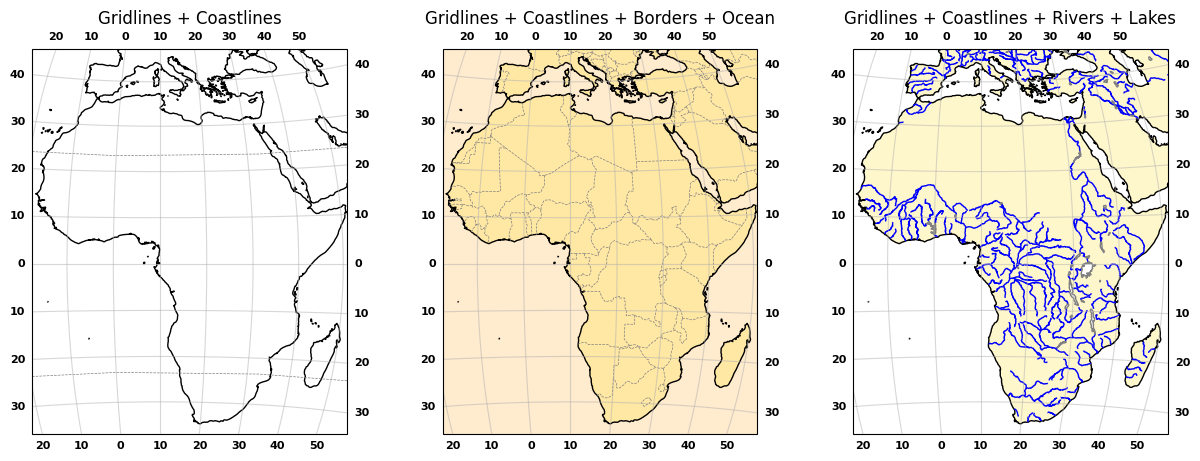

In [3]:
fig, axs = plt.subplots(figsize = (15, 5), ncols = 3, 
                        subplot_kw = {'projection': proj4})

for i, ax in enumerate(fig.axes):
    ax.set_extent(extent)
    gl = ax.gridlines(alpha = 0.5, draw_labels = True, x_inline = False, 
                      yformatter = lat_formatter, xformatter = lon_formatter,
                      ylabel_style = {"size": 8, "weight": "bold"},
                      xlabel_style = {"size": 8, "weight": "bold"})
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(resolution = '50m')

axs[0].set_title('Gridlines + Coastlines') 
axs[0].plot(c_lons, cap_lats, linestyle = '--', transform = ccrs.PlateCarree(), color = 'grey', linewidth = 0.5)
axs[0].plot(c_lons, can_lats, linestyle = '--', transform = ccrs.PlateCarree(), color = 'grey', linewidth = 0.5)

axs[1].set_title('Gridlines + Coastlines + Borders + Ocean') 
axs[1].add_feature(cfeat.BORDERS, linestyle = '--', edgecolor = 'grey', linewidth = 0.5)
axs[1].set_facecolor(oceancol)
axs[1].add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2)

axs[2].set_title('Gridlines + Coastlines + Rivers + Lakes')
axs[2].add_feature(rivers_10m, facecolor = 'None', edgecolor = 'b', linewidth = 1) 
axs[2].add_feature(cfeat.LAKES.with_scale('50m'), alpha = 1, facecolor = 'white', edgecolor = 'gray', linewidth = 1)
axs[2].add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2);

### Font Test

Use the Matplotlib font library to manually find a font hat is most suitable for the map title.

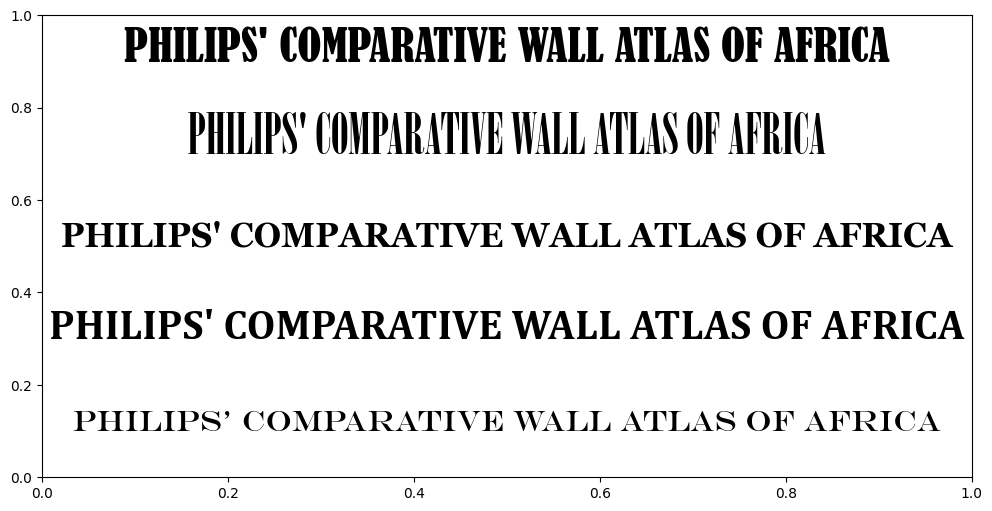

In [22]:
title = "PHILIPS' COMPARATIVE WALL ATLAS OF AFRICA"

font1 = 'Bernard MT Condensed'
font2 = 'Onyx'
font3 = 'Georgia'
font4 = 'Cambria'
font5 = 'Engravers MT'

fig, ax = plt.subplots(figsize = (12, 6))
ax.text(0.5, 0.9, title, ha = 'center', fontname = font1, size = 32)
ax.text(0.5, 0.7, title, ha = 'center', fontname = font2, size = 40, fontweight = 'bold')
ax.text(0.5, 0.5, title, ha = 'center', fontname = font3, size = 24, fontweight = 'bold')
ax.text(0.5, 0.3, title, ha = 'center', fontname = font4, size = 30, fontweight = 'bold')
ax.text(0.5, 0.1, title, ha = 'center', fontname = font5, size = 20, fontweight = 'bold');

And the winner is `'Bernard MT Condensed'`

### Make a template

Define a function which plots a map incorporating the inbuilt cartopy features (map projection, gridlines, country borders, coast lines, title font).

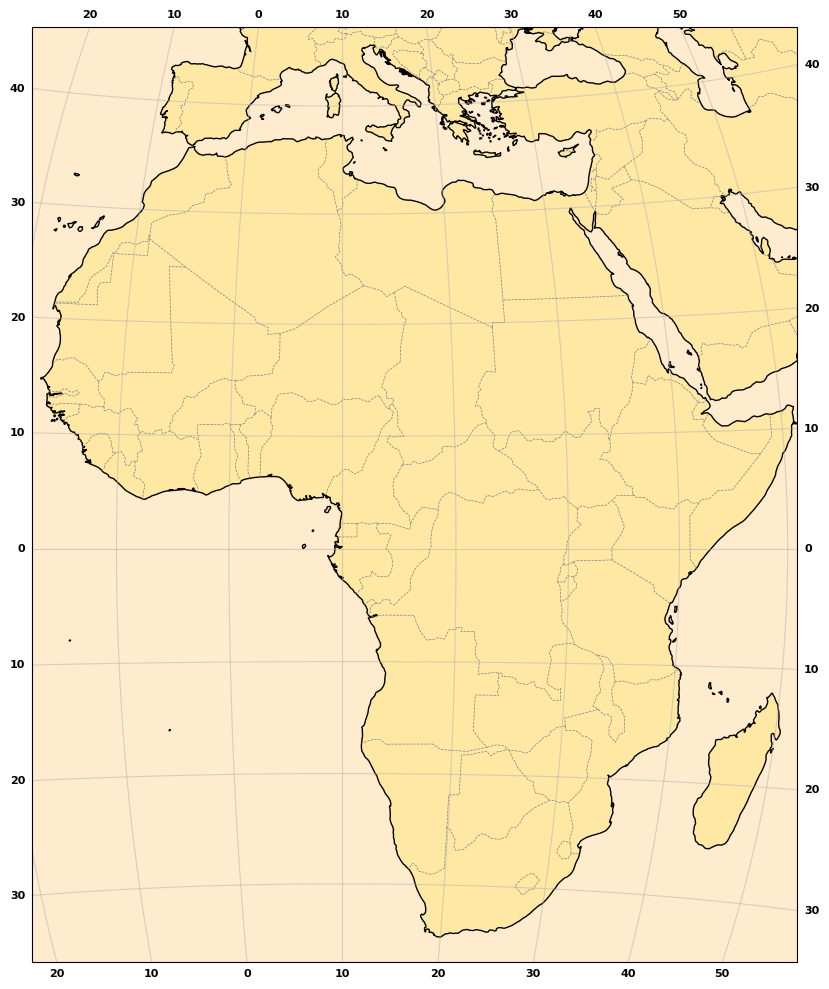

In [21]:
def plot_template(ax, 
                  proj=ccrs.LambertAzimuthalEqualArea(central_longitude = 10), 
                  name="PHILIPS' COMPARATIVE WALL ATLAS OF AFRICA"):
    ax.set_extent(extent)
    gl = ax.gridlines(alpha = 0.5, draw_labels = True, x_inline = False, 
                      yformatter = lat_formatter, xformatter = lon_formatter,
                      ylabel_style = {"size": 8, "weight": "bold"},
                      xlabel_style = {"size": 8, "weight": "bold"})
    gl.xlocator = mticker.FixedLocator(xticks)
    gl.ylocator = mticker.FixedLocator(yticks)
    ax.coastlines(resolution = '50m')
    ax.set_facecolor(oceancol)
    ax.add_feature(cfeat.LAND, facecolor = landcol, alpha = 0.2)
    ax.add_feature(cfeat.BORDERS, linestyle = '--', edgecolor = 'grey', linewidth = 0.5)

fig, ax = plt.subplots(figsize = figsize, subplot_kw = {'projection': proj4})
plot_template(ax)

### River Weighting


**Resources :**
- [Python Maps tutorial](https://towardsdatascience.com/creating-beautiful-river-maps-with-python-37c9b5f5b74c)
- [Data](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/wrcr.20440)

In [8]:
africa_rivers = gpd.read_file('data/afrivs.shp')
africa_rivers.head(5)

,cat,AREA,UP_CELLS,DISCHARGE,WIDTH,WIDTH5,WIDTH95,DEPTH,DEPTH5,DEPTH95,ARCID,geometry
0,1,24.56,142,0.55,5.32,1.94,14.74,0.21,0.10,0.49,1,"LINESTRING (9.80417 37.31250, 9.81042 37.31875..."
1,2,34.98,199,0.79,6.38,2.32,17.81,0.25,0.11,0.57,2,"LINESTRING (9.75833 37.27083, 9.76458 37.26458..."
2,3,97.00,566,2.25,10.80,3.84,30.78,0.37,0.16,0.87,4,"LINESTRING (9.39792 37.21458, 9.40625 37.22292..."
3,4,74.98,111,1.72,9.45,3.38,26.81,0.33,0.15,0.78,5,"LINESTRING (9.41250 37.21667, 9.40625 37.21042..."
4,5,408.69,106,9.91,22.66,7.82,66.56,0.66,0.29,1.58,6,"LINESTRING (9.50208 37.20833, 9.50208 37.20208..."
